In [2]:
import gensim
import numpy as np
import pandas as pd
import pickle

In [3]:
corpus = pickle.load(open('LDA_corpus.pkl', 'rb'))
dictionary = gensim.corpora.Dictionary.load('LDA_dictionary.gensim')
ldamodel = gensim.models.LdaModel.load('LDA_model10.gensim')

In [4]:
all_topics_csr = gensim.matutils.corpus2csc(ldamodel.get_document_topics(corpus))
all_topics_numpy = all_topics_csr.T.toarray()

df = pd.read_csv('../Innovation/Innovation-Scopus-has_abstract.tab', delimiter='\t')
df = df.drop([0, 1])
df.reset_index(drop=True, inplace=True)

topic_df = pd.DataFrame(all_topics_numpy, columns=["Topic 1", "Topic 2", "Topic 3", "Topic 4", "Topic 5", 
                                                "Topic 6", "Topic 7", "Topic 8", "Topic 9", "Topic 10"])

data = pd.concat([df, topic_df], axis=1)
data.to_csv('topics.csv', index=False)

In [5]:
import seaborn as sns; sns.set(rc={'figure.figsize':(6,20)})

ind = ["Topic 1", "Topic 2", "Topic 3", "Topic 4", "Topic 5", 
       "Topic 6", "Topic 7", "Topic 8", "Topic 9", "Topic 10"]


hm = sns.heatmap(topic_df[ind], xticklabels=ind)

In [6]:
fig = hm.get_figure()
fig.savefig('heat-map.png')

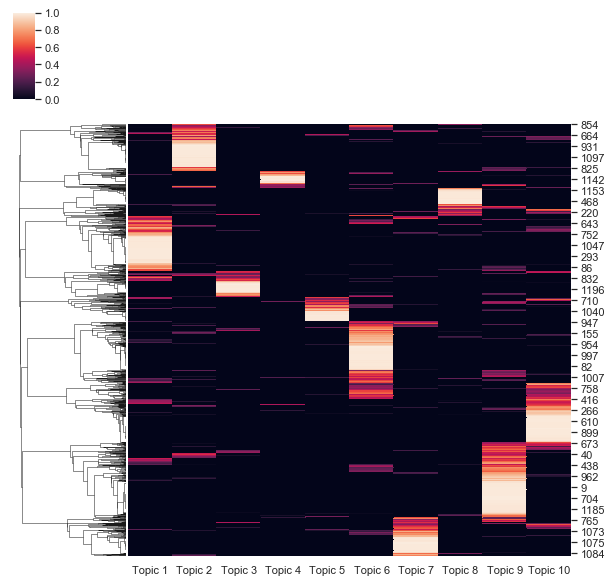

In [7]:
cm = sns.clustermap(topic_df[ind], col_cluster=False)
cm.savefig('cluster-map.png') 

In [8]:
import itertools

data['Date'] = pd.to_datetime(df['Date'])
time1 = '2011-01-01'
time2 = '2019-12-31'
subset = data[(data['Date'] > time1) & (data['Date'] <= time2)]

In [9]:
tokens = list(itertools.compress(pickle.load(open('../Preprocessing/tokens.pkl', 'rb')), subset.index))
subset_corpus = [dictionary.doc2bow(text) for text in tokens]
vector = ldamodel[subset_corpus]

In [10]:
subset_topics_csr = gensim.matutils.corpus2csc(vector)
subset_topics_numpy = subset_topics_csr.T.toarray()

In [11]:
subset_topic_df = pd.DataFrame(subset_topics_numpy, columns=["Topic 1", "Topic 2", "Topic 3", "Topic 4", 
                                                             "Topic 5", "Topic 6", "Topic 7", "Topic 8", 
                                                              v  -kmčoššk0oo000"Topic 9", "Topic 10"])
data = pd.concat([df, subset_topic_df], axis=1)

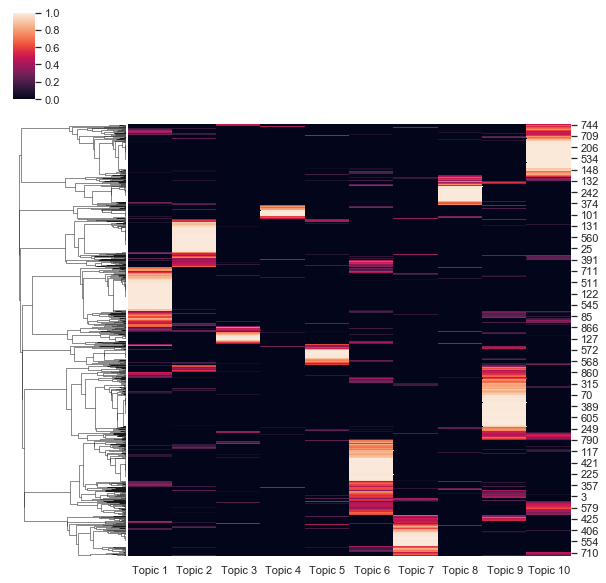

In [12]:
ind = ["Topic 1", "Topic 2", "Topic 3", "Topic 4", "Topic 5", 
       "Topic 6", "Topic 7", "Topic 8", "Topic 9", "Topic 10"]


time_cm = sns.clustermap(subset_topic_df[ind], col_cluster=False)
time_cm.savefig('/Users/ajda/Desktop/cluster-map_{}-{}.png'.format(time1, time2)) 